In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2013.csv', dtype = {'fips': str})
climate_2013 = ur_files.compute()
climate_2013 = climate_2013.loc[:, ~climate_2013.columns.str.contains('^Unnamed')]
climate_2013.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,SuicideDeathRate
0,01001,75.264706,64.640000,9.458611,4.721667,0.175994,0.122222,0.541667,0.002778,0.0,0.127778,69.636778,64.076929,10.5,0.0,3,4.245776
1,01003,12.427907,68.318343,NaN,5.718639,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,8.4,0.0,4,6.136852
2,01005,94.311111,65.180769,8.955220,2.894780,0.136304,0.140110,0.560440,0.019231,0.0,0.208791,70.887648,64.730566,10.1,0.0,6,6.902536
3,01007,162.637500,62.689863,8.563836,3.189041,0.184603,0.120548,0.394521,0.008219,0.0,0.134247,69.454756,61.923223,10.4,0.0,2,4.245776
4,01009,243.931250,58.804972,NaN,4.011602,0.164530,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,10.8,0.0,2,4.245776


In [4]:
climate_2013 = climate_2013[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone', 'rurality', 'SuicideDeathRate']]

In [5]:
climate_2013 = climate_2013.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2013.iloc[:, 1:-1].values
y = climate_2013.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.21324254, 0.07482146, 0.05675888, 0.0554436 , 0.04476842,
       0.04767932, 0.04541448, 0.0596355 , 0.00114667, 0.03644573,
       0.10481811, 0.08969992, 0.11204361, 0.029283  , 0.02879876])

In [10]:
len(rf.feature_importances_)

15

In [11]:
columns = climate_2013.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'PM2.5',
 'Ozone',
 'rurality']

In [13]:
len(columns)

15

Text(0.5, 0, 'Random Forest Feature Importance')

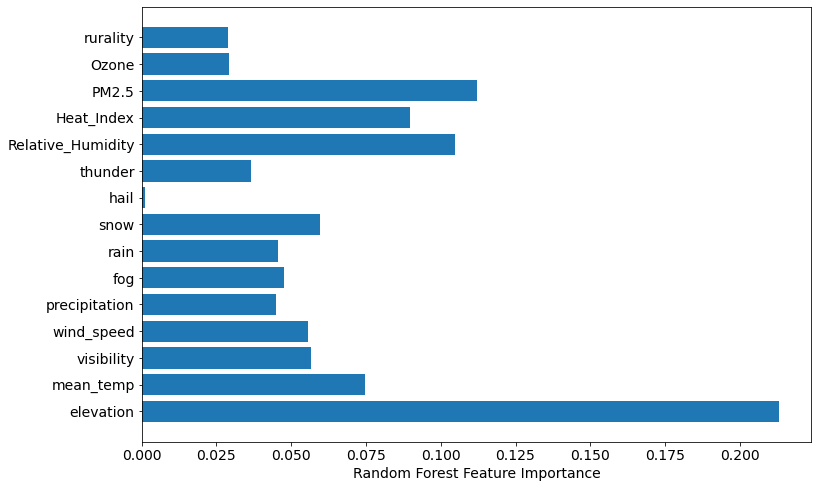

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8, 14, 13,  9,  4,  6,  5,  3,  2,  7,  1, 11, 10, 12,  0])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.00114667, 0.02879876, 0.029283  , 0.03644573, 0.04476842,
       0.04541448, 0.04767932, 0.0554436 , 0.05675888, 0.0596355 ,
       0.07482146, 0.08969992, 0.10481811, 0.11204361, 0.21324254])

Text(0.5, 0, 'Random Forest Feature Importance')

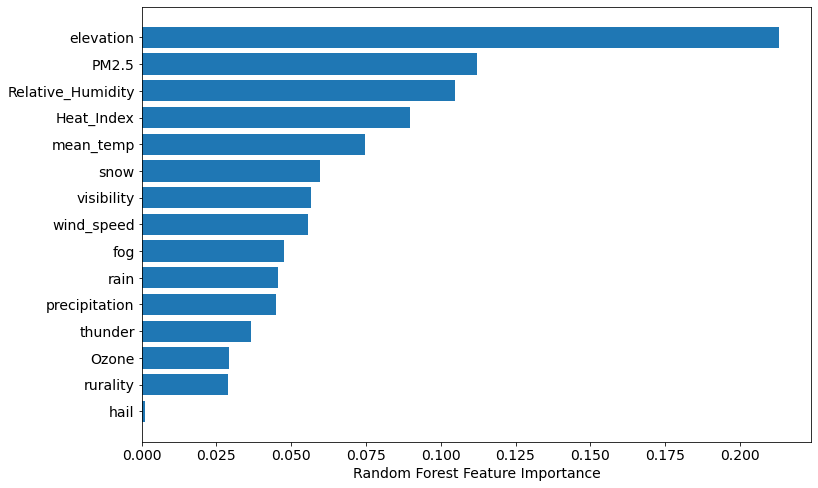

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

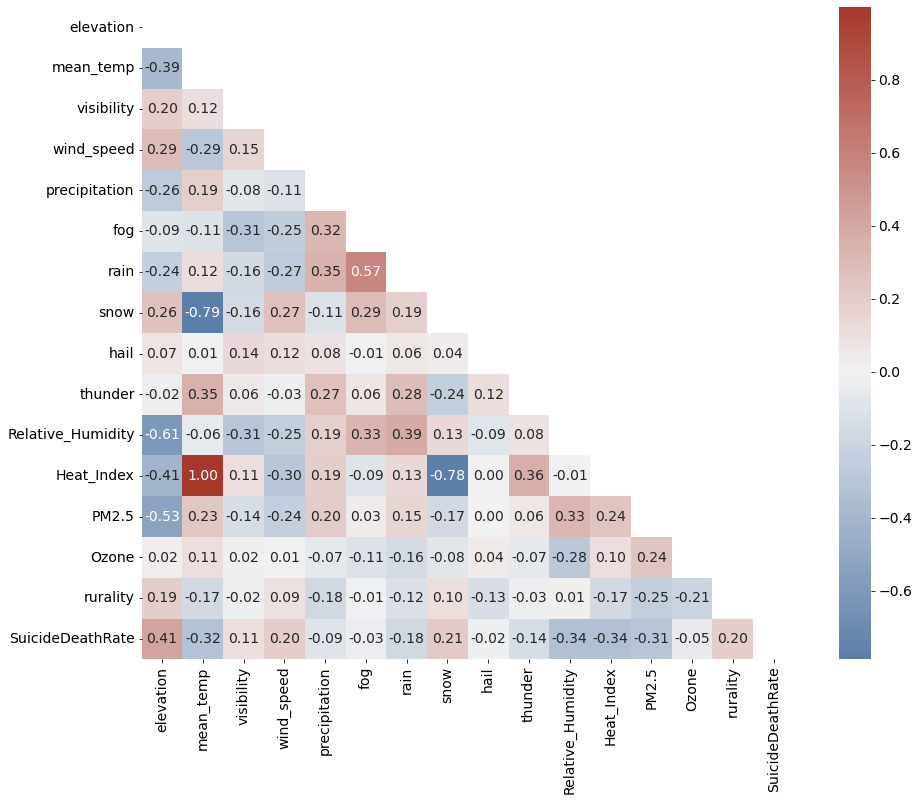

In [21]:
correlation_matrix(climate_2013)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2013.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2013 = ur_files.compute()
social_2013 = social_2013.loc[:, ~social_2013.columns.str.contains('^Unnamed')]
social_2013.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,12033,23441.0,0.181326,0.126320,0.060678,0.074376,0.270338,0.018355,0.115251,0.147921,0.074921,0.212932,0.339823,0.565817,0.067804,0.368714,"Escambia County, FL",6.212866
1,12053,21411.0,0.154438,0.140364,0.134934,0.051859,0.323604,0.016066,0.017090,0.262629,0.099183,0.194779,0.184792,0.561065,0.011501,0.265226,"Hernando County, FL",9.745415
2,12057,27149.0,0.168354,0.137730,0.072071,0.069867,0.233409,0.028160,0.177465,0.121268,0.253345,0.235975,0.469304,0.493081,0.016175,0.312865,"Hillsborough County, FL",5.961700
3,12091,28600.0,0.133890,0.095543,0.077959,0.044763,0.217166,0.018648,0.149217,0.140687,0.092832,0.223210,0.237259,0.539057,0.026214,0.272096,"Okaloosa County, FL",8.771432
4,12123,17045.0,0.166555,0.245327,0.360582,0.061783,0.334827,0.019552,0.010995,0.165931,0.054109,0.193910,0.272462,0.803116,0.135702,0.377763,"Taylor County, FL",4.612464


In [23]:
social_2013['SuicideDeathRate'].isna().sum()

225

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2013 = social_2013.dropna(how = 'any')

In [25]:
social_2013.shape

(2995, 18)

In [26]:
X = social_2013.iloc[:, 1:-2].values
y = social_2013.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.05199286, 0.04752717, 0.08787335, 0.08950117, 0.04943463,
       0.04379063, 0.07548735, 0.04337387, 0.08508556, 0.08157999,
       0.06569139, 0.08638035, 0.05597555, 0.05272579, 0.08358034])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2013.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2013.shape

(2995, 18)

In [32]:
climate_2013.shape

(2648, 17)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

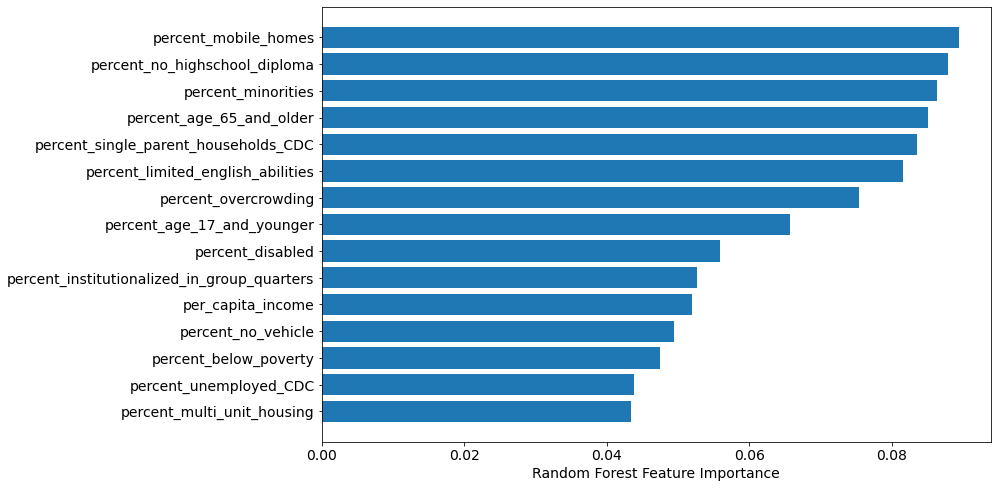

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

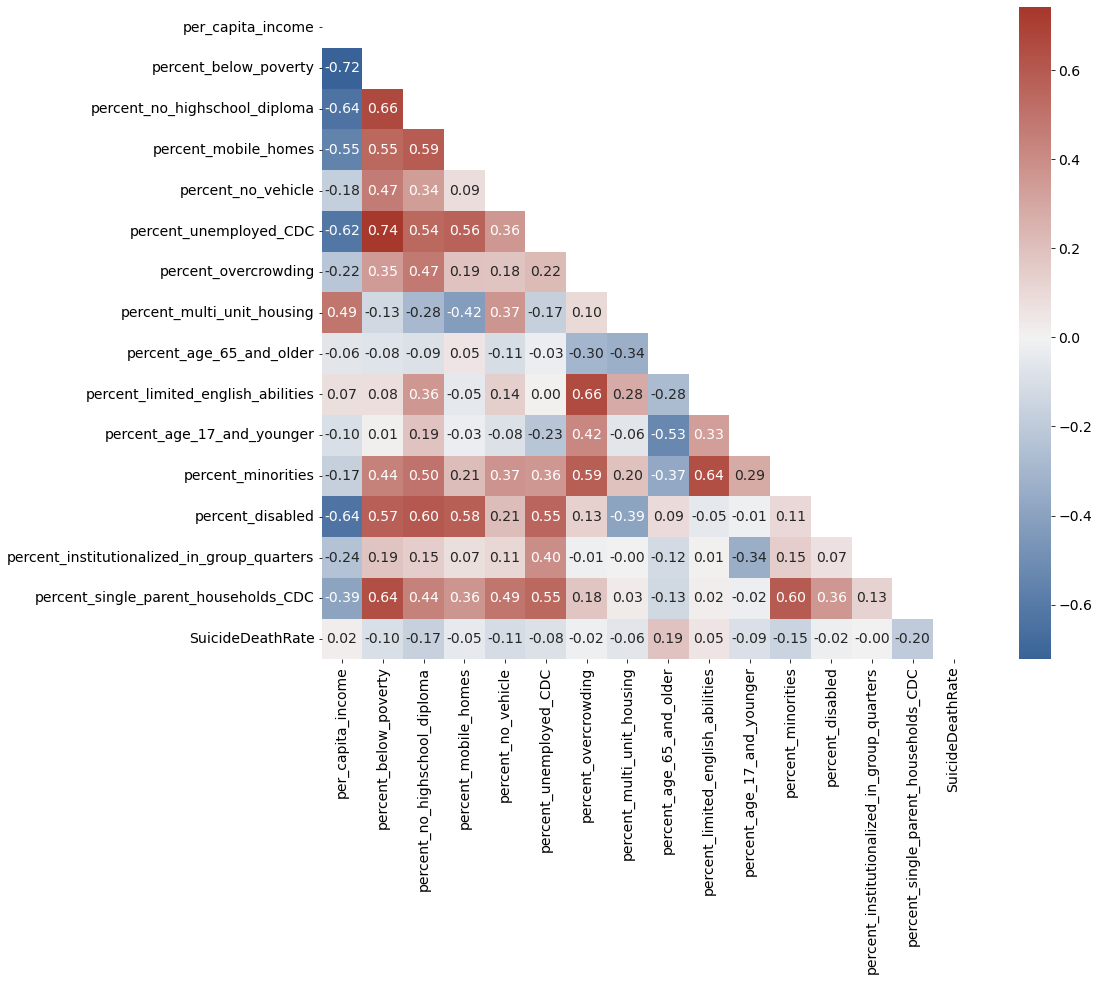

In [36]:
correlation_matrix(social_2013)

## find the rank of importances of all factors

In [37]:
df_total = social_2013.merge(climate_2013, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality
0,12033,23441.0,0.181326,0.126320,0.060678,0.074376,0.270338,0.018355,0.115251,0.147921,...,0.019444,0.169444,0.00000,0.0,0.011111,70.183438,68.844233,7.5,1.0,3.0
1,12053,21411.0,0.154438,0.140364,0.134934,0.051859,0.323604,0.016066,0.017090,0.262629,...,0.158904,0.372603,0.00000,0.0,0.057534,74.349482,71.043686,7.0,0.0,2.0
2,12057,27149.0,0.168354,0.137730,0.072071,0.069867,0.233409,0.028160,0.177465,0.121268,...,0.126027,0.438356,0.00274,0.0,0.000000,73.379331,72.667678,6.6,3.0,1.0
3,12091,28600.0,0.133890,0.095543,0.077959,0.044763,0.217166,0.018648,0.149217,0.140687,...,0.180822,0.515068,0.00000,0.0,0.249315,73.545220,66.064625,8.6,0.0,4.0
4,12123,17045.0,0.166555,0.245327,0.360582,0.061783,0.334827,0.019552,0.010995,0.165931,...,0.058333,0.225000,0.00000,0.0,0.075000,66.856350,59.010915,8.0,0.0,6.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone',
       'rurality'], dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index',
       'fog', 'rain', 'snow', 'hail', 'thunder', 'PM2.5',
       'Ozone', 'rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(2648, 33)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,Heat_Index,fog,rain,snow,hail,thunder,PM2.5,Ozone,rurality,SuicideDeathRate
0,12033,"Escambia County, FL",0.181326,23441.0,0.270338,0.126320,0.147921,0.212932,0.565817,0.368714,...,68.844233,0.019444,0.169444,0.00000,0.0,0.011111,7.5,1.0,3.0,6.212866
1,12053,"Hernando County, FL",0.154438,21411.0,0.323604,0.140364,0.262629,0.194779,0.561065,0.265226,...,71.043686,0.158904,0.372603,0.00000,0.0,0.057534,7.0,0.0,2.0,9.745415
2,12057,"Hillsborough County, FL",0.168354,27149.0,0.233409,0.137730,0.121268,0.235975,0.493081,0.312865,...,72.667678,0.126027,0.438356,0.00274,0.0,0.000000,6.6,3.0,1.0,5.961700
3,12091,"Okaloosa County, FL",0.133890,28600.0,0.217166,0.095543,0.140687,0.223210,0.539057,0.272096,...,66.064625,0.180822,0.515068,0.00000,0.0,0.249315,8.6,0.0,4.0,8.771432
4,12123,"Taylor County, FL",0.166555,17045.0,0.334827,0.245327,0.165931,0.193910,0.803116,0.377763,...,59.010915,0.058333,0.225000,0.00000,0.0,0.075000,8.0,0.0,6.0,4.612464


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.0202774 , 0.02415904, 0.01787804, 0.01844162, 0.02881382,
       0.01743585, 0.02791536, 0.02231209, 0.07421419, 0.02700997,
       0.01632829, 0.0279188 , 0.02537489, 0.02305467, 0.01888427,
       0.21283846, 0.049863  , 0.02968947, 0.0313536 , 0.01993918,
       0.06605913, 0.04285408, 0.02475672, 0.0235657 , 0.02170478,
       0.00040027, 0.02277014, 0.04566199, 0.01044965, 0.00807551])

In [47]:
len(rf.feature_importances_)

30

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'PM2.5',
 'Ozone',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

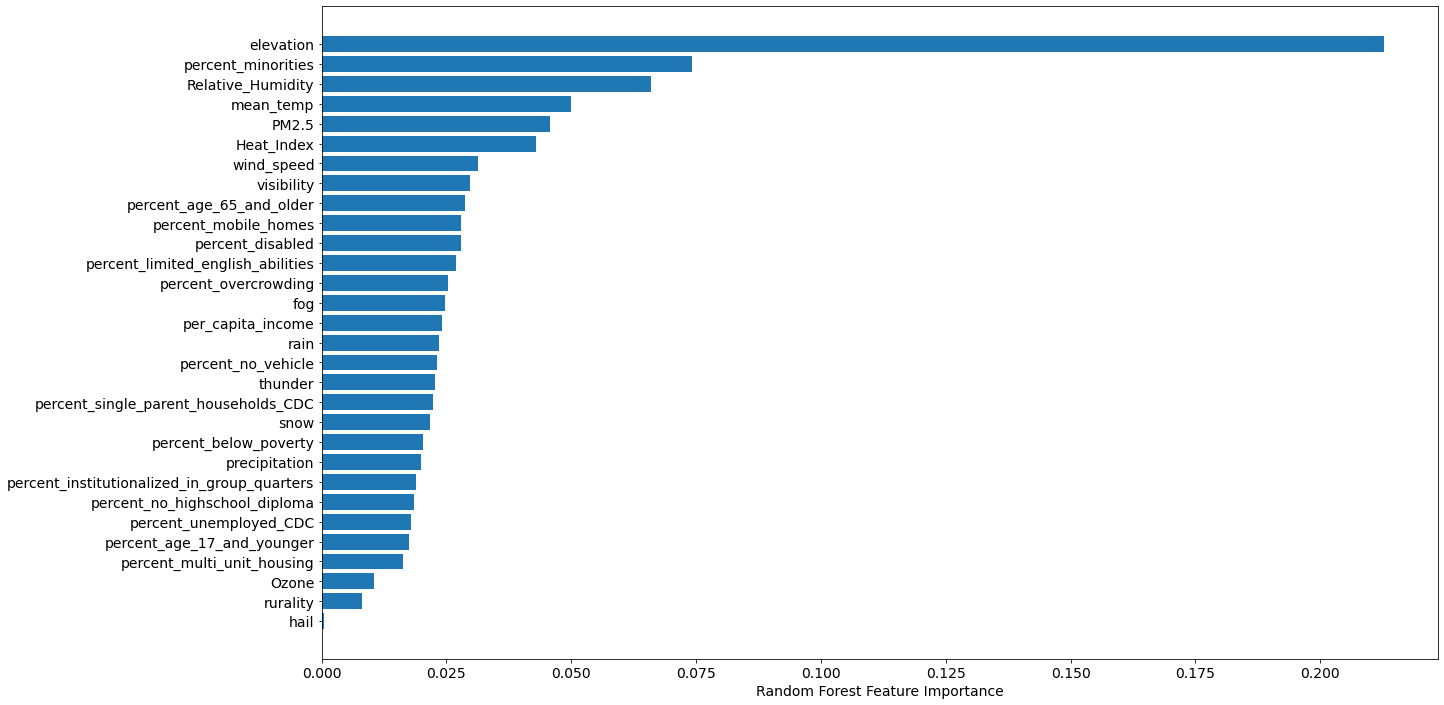

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## SHAP

In [52]:
import xgboost
import shap

In [53]:
X = climate_2013.iloc[:, 1:-1]
y = climate_2013.iloc[:, -1].array

In [54]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


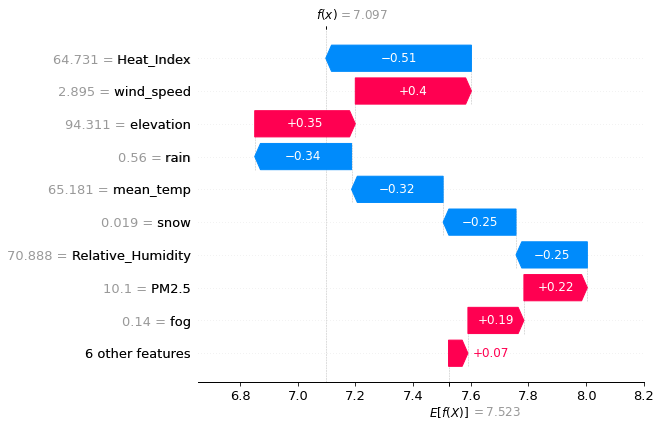

In [55]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

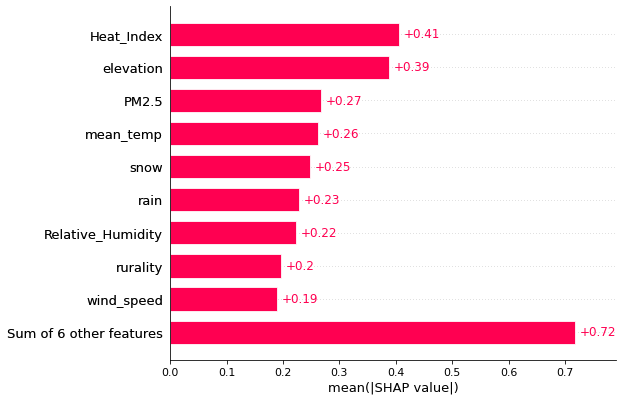

In [56]:
shap.plots.bar(shap_values)

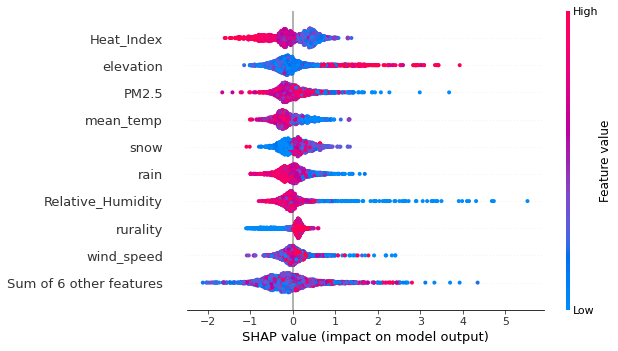

In [57]:
shap.plots.beeswarm(shap_values)

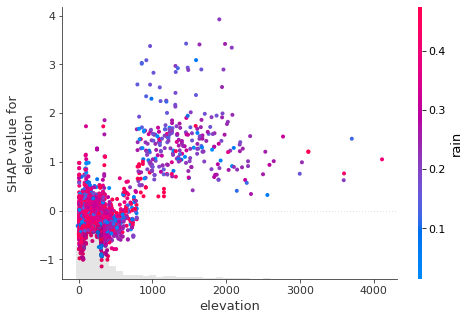

In [58]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

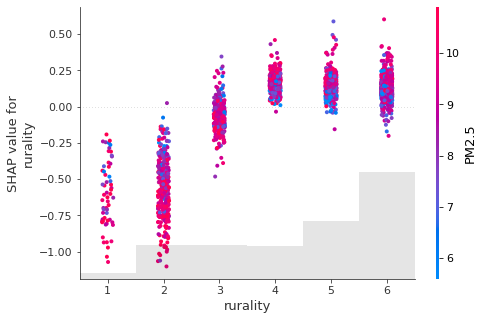

In [59]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

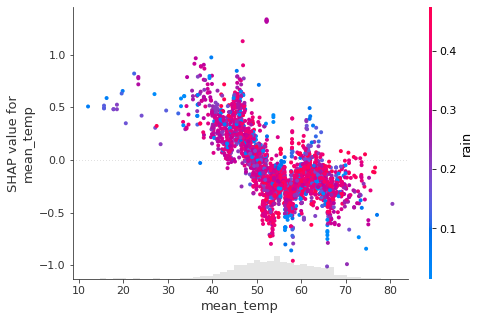

In [60]:
shap.plots.scatter(shap_values[:,"mean_temp"], color=shap_values)

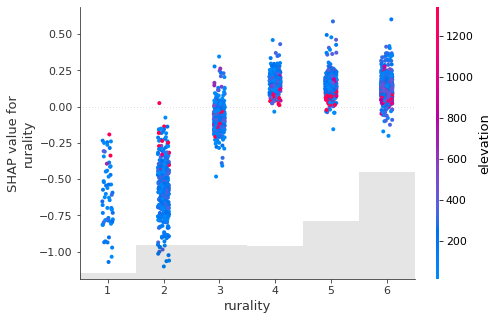

In [61]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"])

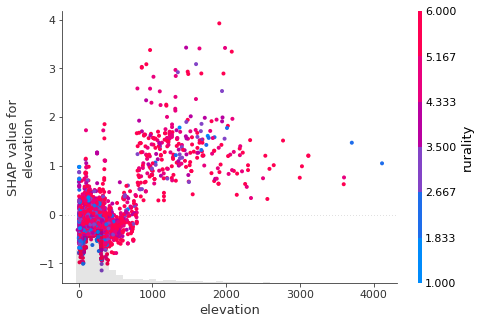

In [62]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

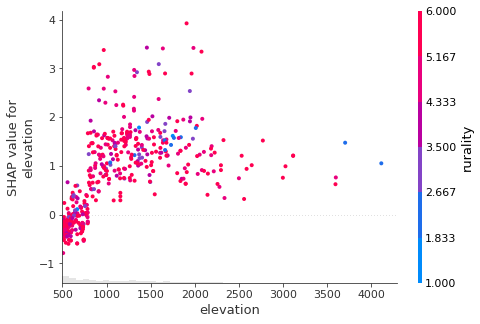

In [64]:
shap.plots.scatter(shap_values[:,"elevation"],shap_values[:,"rurality"], xmin=500)

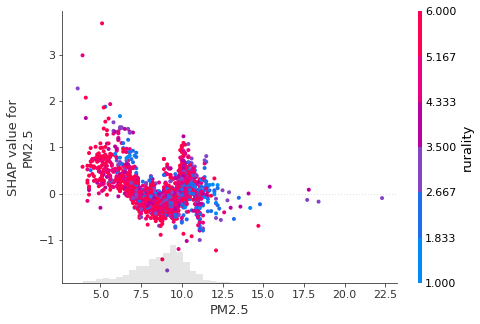

In [65]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"rurality"])

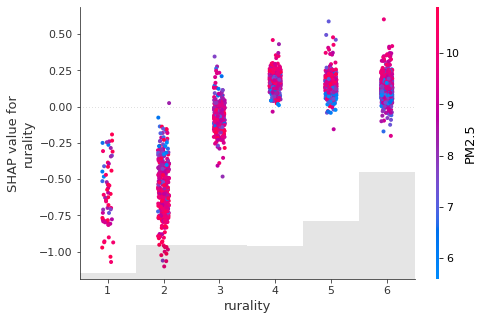

In [66]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"PM2.5"])

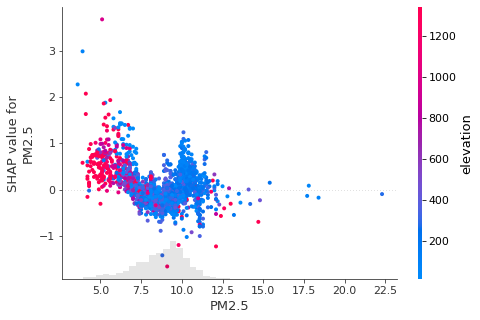

In [67]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"elevation"])

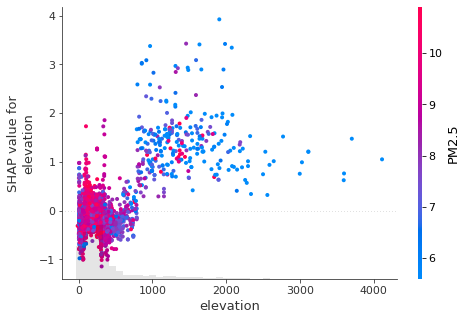

In [68]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"PM2.5"])

### social economic factors

In [69]:
social_2013.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,12033,23441.0,0.181326,0.126320,0.060678,0.074376,0.270338,0.018355,0.115251,0.147921,0.074921,0.212932,0.339823,0.565817,0.067804,0.368714,"Escambia County, FL",6.212866
1,12053,21411.0,0.154438,0.140364,0.134934,0.051859,0.323604,0.016066,0.017090,0.262629,0.099183,0.194779,0.184792,0.561065,0.011501,0.265226,"Hernando County, FL",9.745415
2,12057,27149.0,0.168354,0.137730,0.072071,0.069867,0.233409,0.028160,0.177465,0.121268,0.253345,0.235975,0.469304,0.493081,0.016175,0.312865,"Hillsborough County, FL",5.961700
3,12091,28600.0,0.133890,0.095543,0.077959,0.044763,0.217166,0.018648,0.149217,0.140687,0.092832,0.223210,0.237259,0.539057,0.026214,0.272096,"Okaloosa County, FL",8.771432
4,12123,17045.0,0.166555,0.245327,0.360582,0.061783,0.334827,0.019552,0.010995,0.165931,0.054109,0.193910,0.272462,0.803116,0.135702,0.377763,"Taylor County, FL",4.612464


In [70]:
X = social_2013.iloc[:, 1:-2]
y = social_2013.iloc[:, -1].array

In [71]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


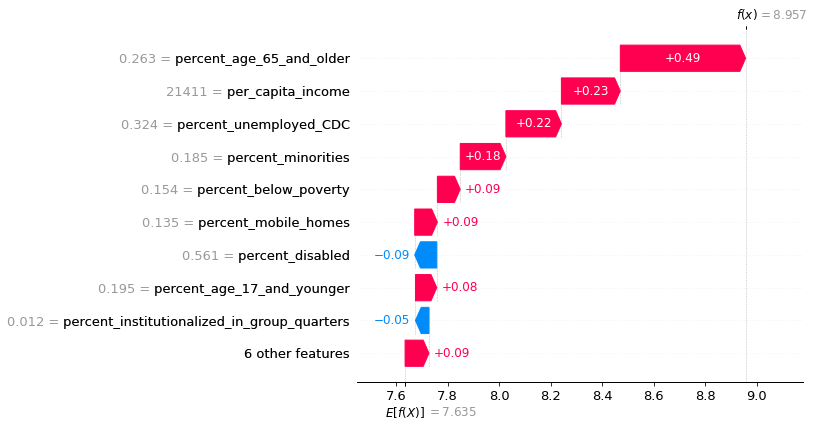

In [72]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

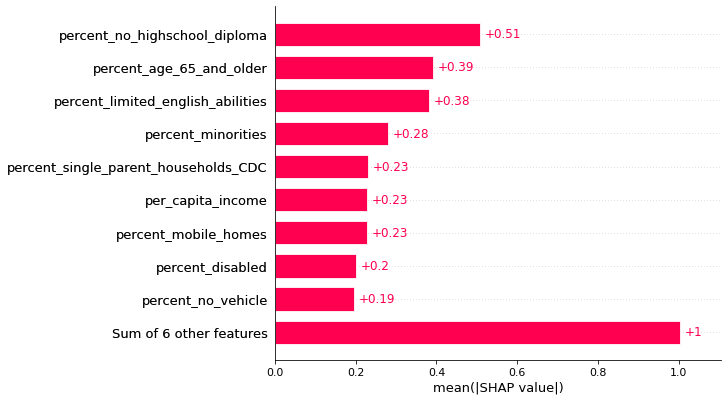

In [73]:
shap.plots.bar(shap_values)

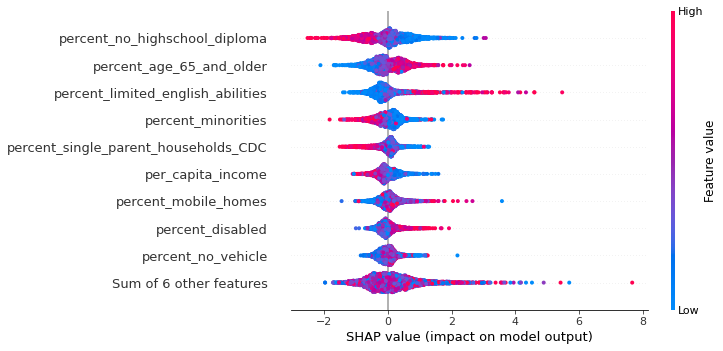

In [74]:
shap.plots.beeswarm(shap_values)

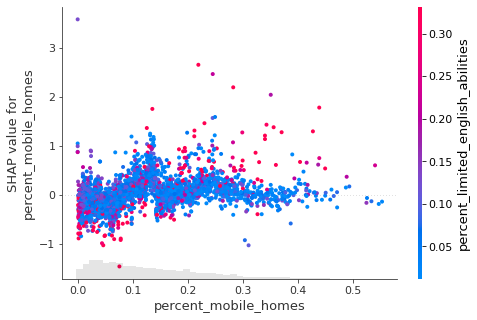

In [75]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)